# Adversarial Random Forest

In [1]:
# stdlib
import warnings

warnings.filterwarnings("ignore")

# third party
from sklearn.datasets import load_iris, load_diabetes
from arfpy import arf

# synthcity absolute
from synthcity.plugins import Plugins

eval_plugin = "great"

### Load dataset

In [2]:
# synthcity absolute
from synthcity.plugins.core.dataloader import GenericDataLoader

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

loader = GenericDataLoader(X, target_column="target", sensitive_columns=["sex"])

loader.dataframe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Train the generator

In [3]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)


2023-06-01 12:48:01,968 - Created a temporary directory at /tmp/tmp4klom62f
2023-06-01 12:48:01,969 - Writing /tmp/tmp4klom62f/_remote_module_non_scriptable.py


In [4]:

syn_model.fit(loader)

Initial accuracy is 0.75
Iteration number 1 reached accuracy of 0.4095022624434389.


### Generate new samples

In [5]:
syn_model.generate(count=10).dataframe() # max count==67 for diabetes dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.086393,-0.044642,0.007827,-0.082694,-0.070826,-0.031689,-0.022770,-0.040690,-0.060941,-0.004776,151.946358
1,0.095274,-0.044642,0.105097,-0.017663,0.015564,0.063357,-0.014695,0.049971,-0.000491,0.086407,173.325625
2,-0.093247,0.050680,0.002027,0.010936,0.031776,0.078785,-0.036780,0.069716,0.054071,-0.022569,93.216366
3,-0.003044,-0.044642,-0.011851,0.042983,0.050315,0.015271,-0.029527,0.081901,0.036231,-0.030540,247.961946
4,0.046480,-0.044642,0.008256,0.014460,0.076982,0.032764,-0.023157,0.055037,0.043250,-0.009325,197.697742
5,0.010281,-0.044642,-0.074313,-0.018122,-0.061187,0.007181,0.037822,-0.043901,-0.000467,0.018067,112.687665
6,0.013900,-0.044642,0.094329,-0.002838,0.029468,0.015944,-0.043888,0.088412,0.112952,0.063410,290.921132
7,0.028002,0.050680,0.004196,-0.012448,-0.049430,0.000453,0.015044,0.048480,0.014182,-0.006435,108.241937
8,0.077659,-0.044642,0.025821,-0.026111,-0.063871,-0.024846,-0.035111,0.018119,0.027371,-0.031979,163.642922
9,-0.015496,-0.044642,0.029851,-0.044488,0.015254,0.038776,-0.012563,0.180835,0.053852,-0.014664,211.509308


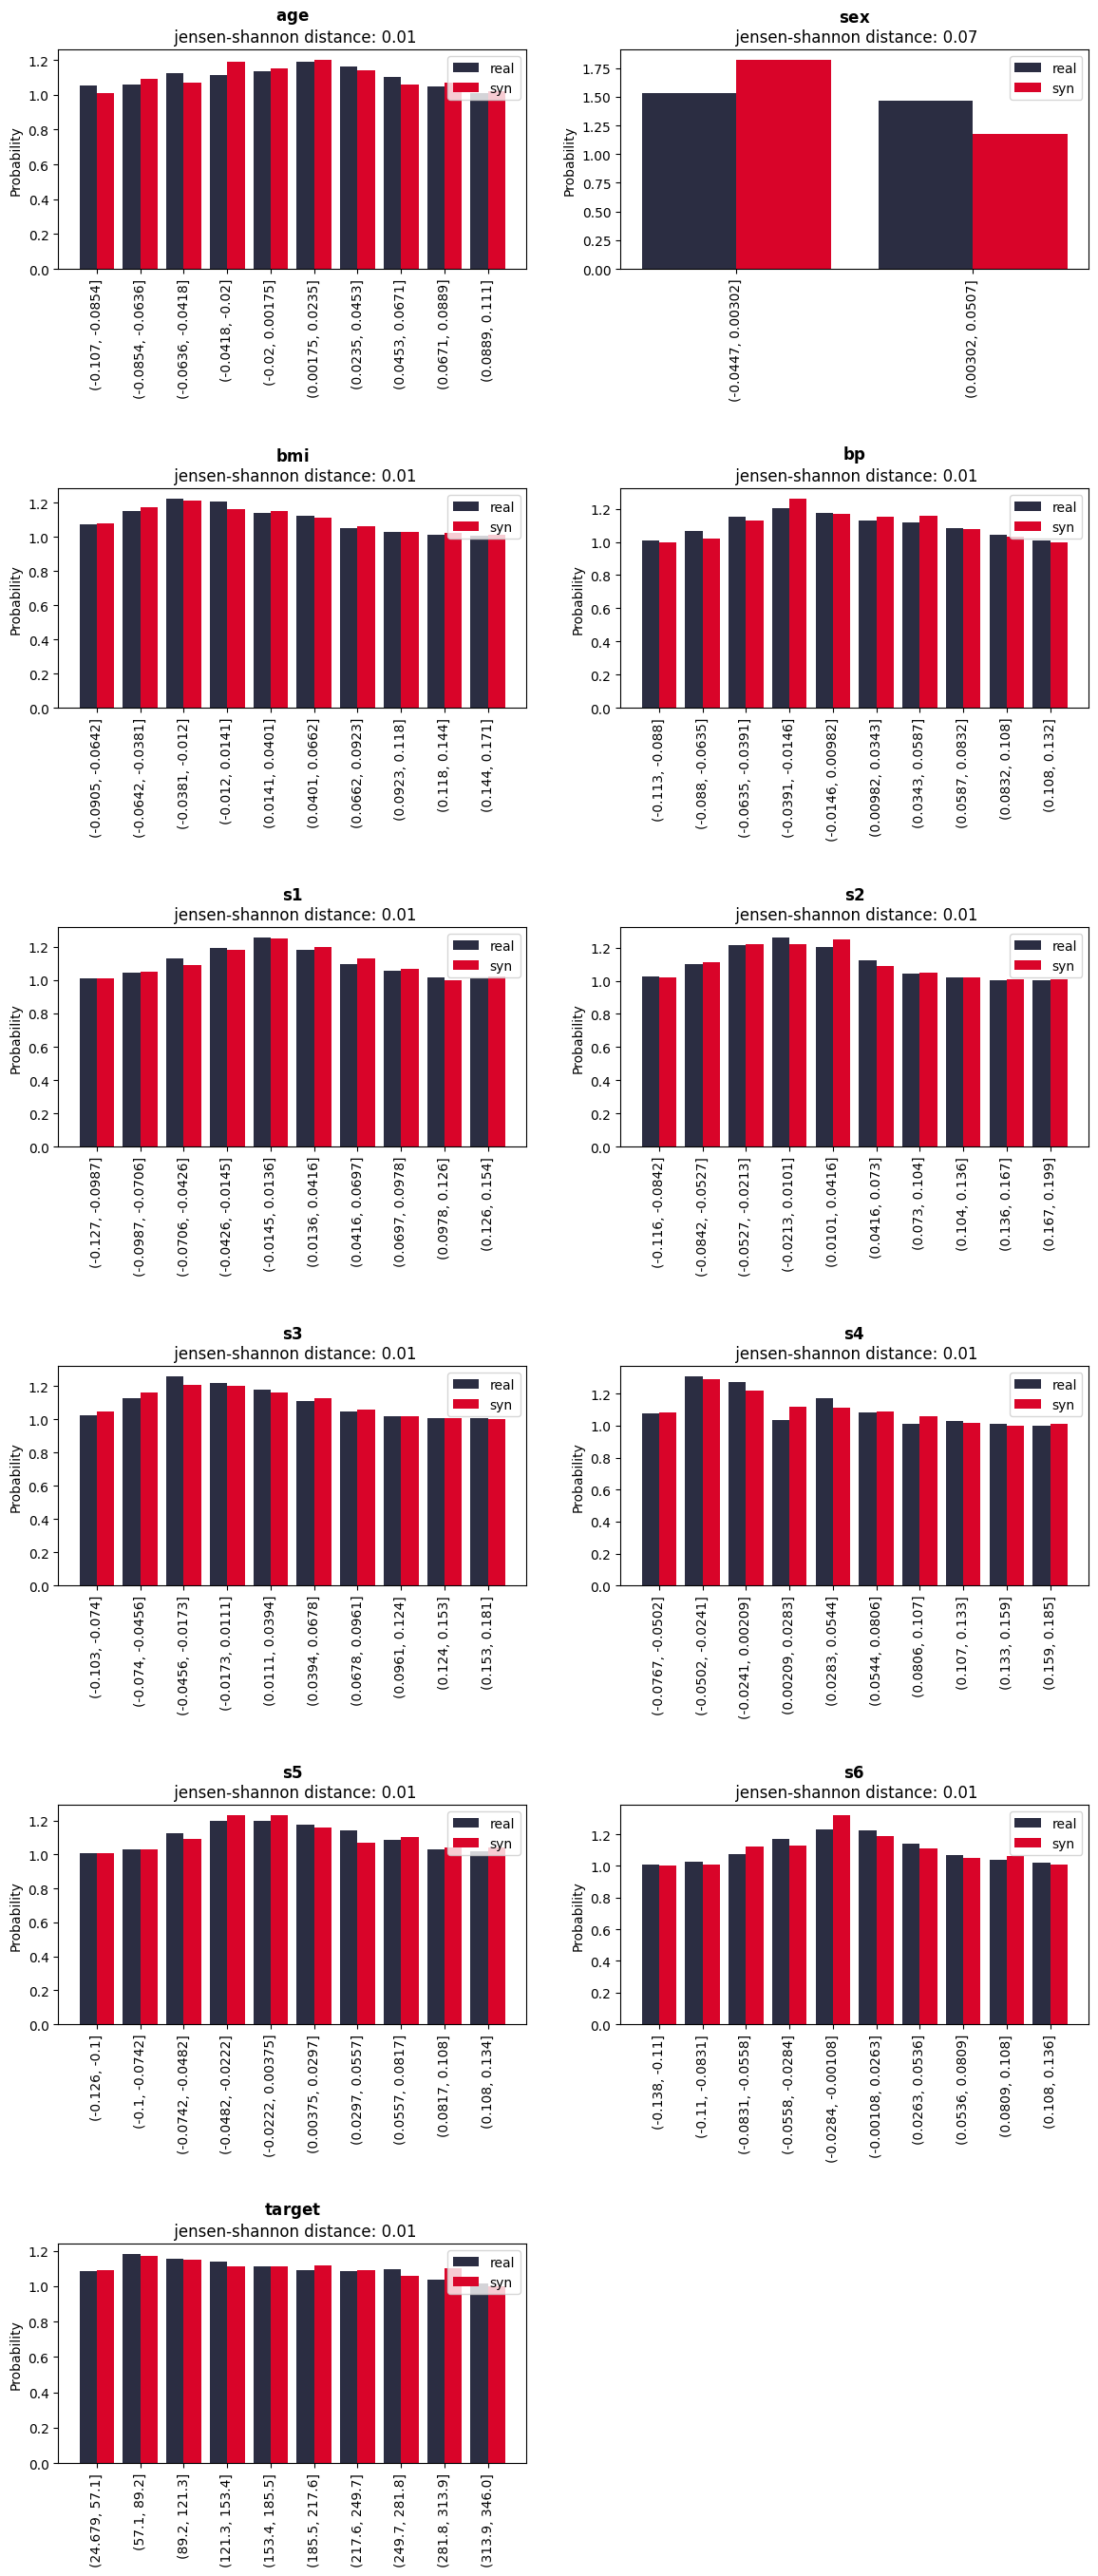

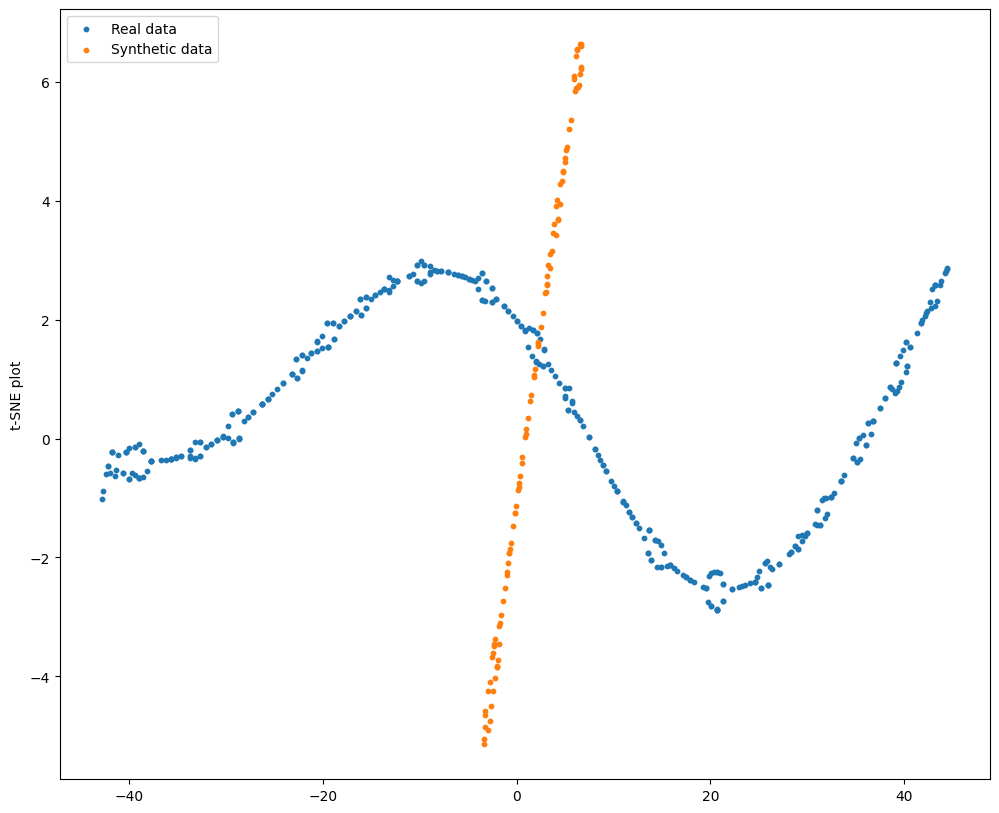

In [6]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader, count=100)

plt.show()

### Benchmarks

In [7]:
# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        (eval_plugin, eval_plugin, {})
    ],  # (testname, plugin, plugin_args) The plugin_args are given are simply to illustrate some of the paramters that can be passed to the plugin
    loader,
    repeats=2,
    metrics={"detection": ["detection_mlp"]},  # DELETE THIS LINE FOR ALL METRICS
)

Initial accuracy is 0.7960339943342776
Iteration number 1 reached accuracy of 0.3654390934844193.


[2023-06-01T12:48:11.864152+0100][13928][CRITICAL] [arf][take 0] failed: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.


Initial accuracy is 0.8116147308781869
Iteration number 1 reached accuracy of 0.3526912181303116.


[2023-06-01T12:48:15.490117+0100][13928][CRITICAL] [arf][take 1] failed: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.


In [8]:
Benchmarks.print(score)


Plugin : arf


,min,max,mean,stddev,median,iqr,rounds,errors,durations
